Covid - 19
=================
#### *Predicting next 7-days 2019-nCoV cumulative Confirmed, Infected, Recovered, Death cases using Linear Regression Model*

You are a Data Scientist working for the World Health Organization (WHO). Due to the outbreak of 2019-nCoV, WHO is alerted to several cases of pneumonia and wants to know how this virus will affect the population, specifically whether the Healthcare System in place is capable of addressing this issue. Therefore, you are tasked to predict the cumulative number of people affected for the next 7-days.

* __Category__: #Linear Regression  
* __Dataset__: Novel Corona Virus 2019 Dataset  
* __Dataset Link__: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/download

Dataset Desciption:
----------------------------
> __SNo__: *Serial Number*  
> __ObservationDate__: *Observation date in mm/dd/yyyy*  
> __Province/State__: *Province or State*  
> __Country/Region__: *Country or region*  
> __Last Update__: *Last update date time in UTC*  
> __Confirmed__: *Cumulative number of confirmed cases*  
> __Deaths__: *Cumulative number of deaths cases*  
> __Recovered__: *Cumulative number of recovered cases*  
> __*Infected__: *Confirmed - Recovered - Deaths*  


In [32]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [33]:
data=pd.read_csv("covid_19_data.csv")
df=data.copy()
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Analyzing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3956 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [35]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SNo,6722,NaN,NaN,NaN,3361.5,1940.62,1,1681.25,3361.5,5041.75,6722
ObservationDate,6722,57,03/18/2020,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province/State,3956,276,Hebei,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,6722,179,Mainland China,1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Update,6722,1637,2020-03-11T20:00:00,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,6722,NaN,NaN,NaN,601.196,4896.33,0,2,13,108,67800
Deaths,6722,NaN,NaN,NaN,19.8558,204.487,0,0,0,1,3122
Recovered,6722,NaN,NaN,NaN,226.341,2556.04,0,0,0,11,56927


### Data Cleaning

In [36]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [37]:
cols = df.columns
df.columns = [col.lower() for col in cols]

df.rename(columns={'observationdate' : 'observation_date', 
                      'country/region' : 'country',
                      'province/state' : 'province',
                      'last update' : 'last_update'}, inplace=True)

df.head()

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [38]:
sorted(df.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [39]:
# Function for Country names

def clean_country(country):
    country = country.lower().strip()
    if country=='mainland china':
        country='china'
#     country = 'china' if country == 'mainland china' else country
    return country


df['country'] = df['country'].apply(lambda country: clean_country(country))

In [40]:
sorted(df.country.unique())

["('st. martin',)",
 'afghanistan',
 'albania',
 'algeria',
 'andorra',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina faso',
 'cambodia',
 'cameroon',
 'canada',
 'cayman islands',
 'central african republic',
 'channel islands',
 'chile',
 'china',
 'colombia',
 'congo (brazzaville)',
 'congo (kinshasa)',
 'costa rica',
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominican republic',
 'ecuador',
 'egypt',
 'equatorial guinea',
 'estonia',
 'eswatini',
 'ethiopia',
 'faroe islands',
 'finland',
 'france',
 'french guiana',
 'gabon',
 'gambia, the',
 'georgia',
 'germany',
 'ghana',
 'gibraltar',
 'greece',
 'greenland',
 'guadeloupe',
 'guam',
 'guatemala',
 'guernsey',
 'guinea',
 'guyana',
 'holy see',
 'honduras',
 'h

In [41]:
df_pure = df.drop(["sno","province",'last_update'],axis=1)

### Preprocessing

In [42]:
df.drop('country',axis=1,inplace=True)

In [43]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  6722 non-null   object 
 1   country           6722 non-null   object 
 2   confirmed         6722 non-null   float64
 3   deaths            6722 non-null   float64
 4   recovered         6722 non-null   float64
dtypes: float64(3), object(2)
memory usage: 262.7+ KB


In [44]:
df_pure = df_pure.groupby(['observation_date']).sum().reset_index()

In [45]:
df_pure["observation_date"]=pd.to_datetime(df_pure["observation_date"])

In [46]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


### Feature Engineering 

In [47]:
df_pure_date_max=df_pure["observation_date"].max()
df_pure_date_min=df_pure["observation_date"].min()
#difference_days=(df_pure_date_max-df_pure_date_min).days

def substarction(date):
    return (date -df_pure_date_min).days + 1

print()

In [48]:
df_pure["day_counter"]=df_pure["observation_date"].apply(lambda x:substarction(x))
df_pure.drop('observation_date',axis=1,inplace=True)
df_pure.head(50)

,confirmed,deaths,recovered,day_counter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5
5,2927.0,82.0,61.0,6
6,5578.0,131.0,107.0,7
7,6165.0,133.0,126.0,8
8,8235.0,171.0,143.0,9
9,9925.0,213.0,222.0,10


In [49]:
df_pure['infected'] = df_pure['confirmed'] - df_pure['recovered'] - df_pure['deaths']

In [50]:
df_pure.head()

,confirmed,deaths,recovered,day_counter,infected
0,555.0,17.0,28.0,1,510.0
1,653.0,18.0,30.0,2,605.0
2,941.0,26.0,36.0,3,879.0
3,1438.0,42.0,39.0,4,1357.0
4,2118.0,56.0,52.0,5,2010.0


# confirmed prediction


In [51]:
y = df_pure["confirmed"]
X = df_pure[["day_counter"]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Modeling


In [52]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train,y_train)
lin_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction and Metrics

In [53]:
y_pred=lin_model.predict(X_test)

In [55]:
R2=r2_score(y_test,y_pred)
print("R-Squared =",R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
adj_R2= 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2 :' ,adj_R2)
MSE=mean_squared_error(y_test,y_pred)
print("MSE =",MSE)
RMSE=np.sqrt(MSE)
print("RMSE =",RMSE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE =",MAE)

R-Squared = 0.8627464919649214
Adjusted R^2 : 0.8521885298083769
MSE = 704199850.5449029
RMSE = 26536.76413101083
MAE = 16220.379848762268


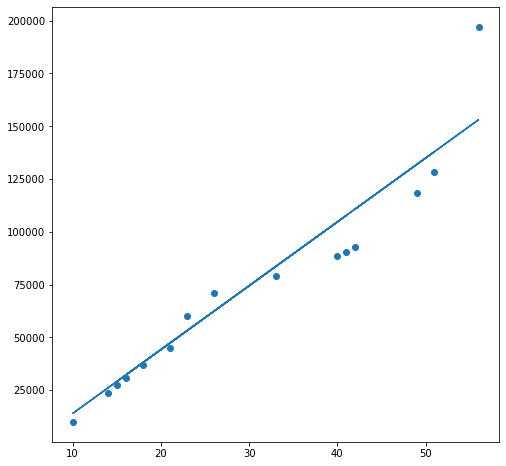

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [198]:
next_7_days = np.array([51,52,53,54,55,56,57])

lin_model.predict(next_7_days.reshape(-1,1))


array([137986.92965768, 141010.87568058, 144034.82170349, 147058.76772639,
       150082.7137493 , 153106.6597722 , 156130.60579511])

# death prediction

In [200]:
y = df_pure["deaths"]
X = df_pure[["day_counter"]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [201]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train,y_train)
lin_model

LinearRegression()

In [202]:
y_pred=lin_model.predict(X_test)

In [203]:
R2=r2_score(y_test,y_pred)
print("R-Squared =",R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
adj_R2= 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2 :' ,adj_R2)
MSE=mean_squared_error(y_test,y_pred)
print("MSE =",MSE)
RMSE=np.sqrt(MSE)
print("RMSE =",RMSE)

R-Squared = 0.886027453541615
Adjusted R^2 : 0.8772603345832778
MSE = 235377.4230012168
RMSE = 485.1571116671555


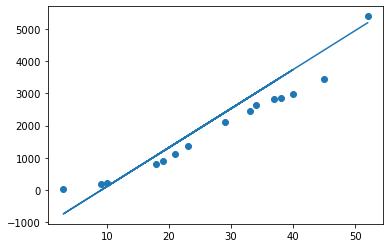

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [205]:
next_7_days = np.array([51,52,53,54,55,56,57])

lin_model.predict(next_7_days.reshape(-1,1))


array([5080.04026909, 5201.44325943, 5322.84624976, 5444.2492401 ,
       5565.65223043, 5687.05522077, 5808.4582111 ])

# Recovered predict

In [206]:
y = df_pure["recovered"]
X = df_pure[["day_counter"]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [207]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train,y_train)
lin_model

LinearRegression()

In [208]:
y_pred=lin_model.predict(X_test)

In [209]:
R2=r2_score(y_test,y_pred)
print("R-Squared =",R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
adj_R2= 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2 :' ,adj_R2)
MSE=mean_squared_error(y_test,y_pred)
print("MSE =",MSE)
RMSE=np.sqrt(MSE)
print("RMSE =",RMSE)

R-Squared = 0.8888813694258275
Adjusted R^2 : 0.8803337824585835
MSE = 51665553.61913009
RMSE = 7187.875459350286


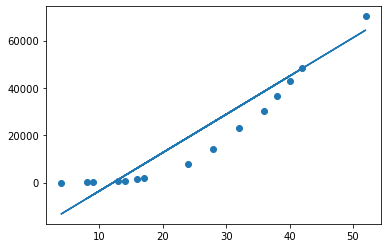

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

# infected prediction

In [250]:
y = df_pure["infected"]
X = df_pure[["day_counter"]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [251]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train,y_train)
lin_model

LinearRegression()

In [252]:
y_pred=lin_model.predict(X_test)

In [253]:
R2=r2_score(y_test,y_pred)
print("R-Squared =",R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
adj_R2= 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2 :' ,adj_R2)
MSE=mean_squared_error(y_test,y_pred)
print("MSE =",MSE)
RMSE=np.sqrt(MSE)
print("RMSE =",RMSE)

R-Squared = -0.09258384276656084
Adjusted R^2 : -0.17662875374860398
MSE = 245721804.0829238
RMSE = 15675.51607070478


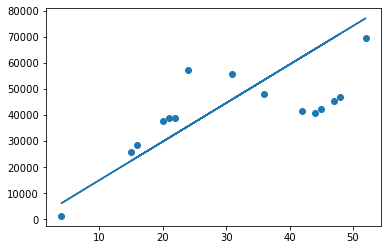

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)